Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [12]:
df = pd.read_csv("/Users/tovancao/Ironhack/3_LAB/WEEK 5/amz_uk_price_prediction_dataset.csv")

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [15]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [18]:
df.shape

(2443651, 9)

In [23]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [26]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64'), dtype('bool')]

In [29]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [32]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [45]:
# Frequency table
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

Top 5 categories are : "Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"

In [56]:
# Creating a crosstab table for the 'MSZoning' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

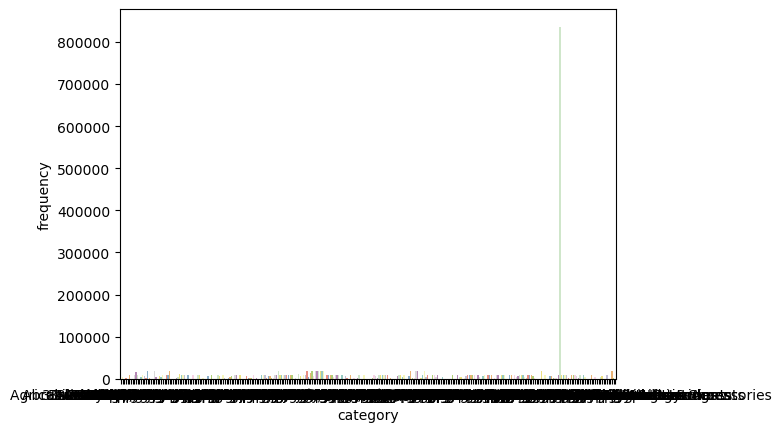

In [60]:
fig, axes = plt.subplots()
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3",hue=my_table.index, legend=False
            ,ax=axes)
axes.set_ylabel("frequency")
axes.set_xlabel("category")
plt.show()

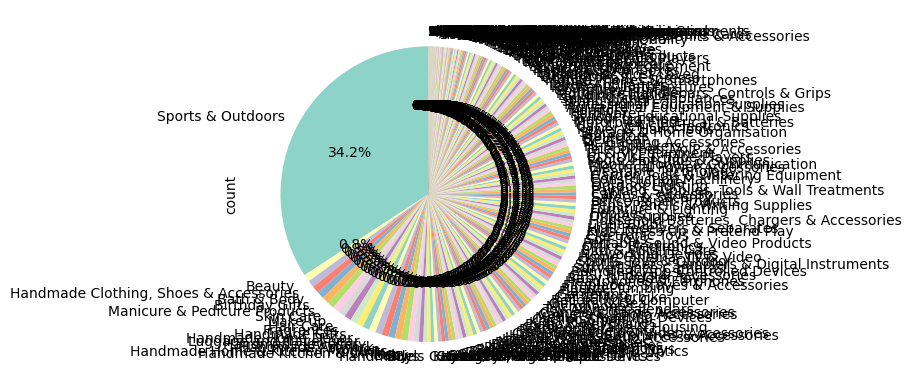

In [63]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

In [68]:
selected_values = ["Sports & Outdoors", "Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"]

# Filter the DataFrame
filtered_table = my_table.loc[selected_values]


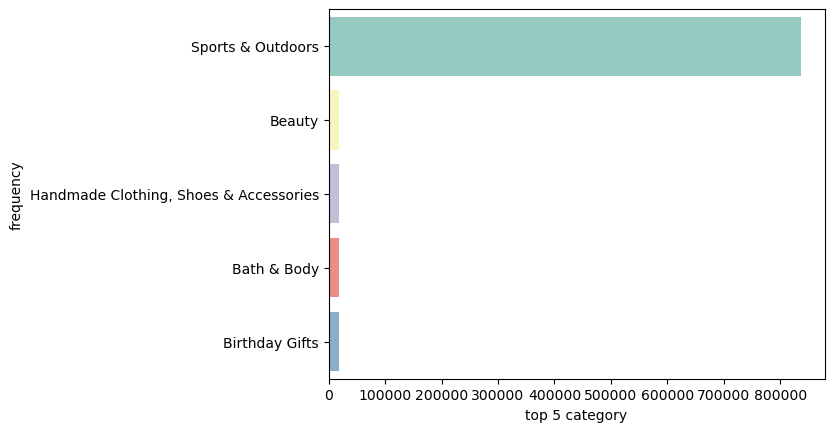

In [80]:
fig, axes = plt.subplots()
sns.barplot(y=filtered_table.index, x=filtered_table["count"], palette="Set3",hue=filtered_table.index, legend=False
            ,ax=axes)
axes.set_ylabel("frequency")
axes.set_xlabel("top 5 category")
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)

In [86]:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].mode())

89.24380943923663
19.09
0    9.99
Name: price, dtype: float64


There is a significant difference between average point and mode which mean there are lots of outliers on the high price range side

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [104]:
display(df['price'].var())
display(df['price'].std())
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
print(range_price)
display(df['price'].quantile([0.25, 0.5, 0.75]))

119445.4853225653

345.6088617535223

100000.0


0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


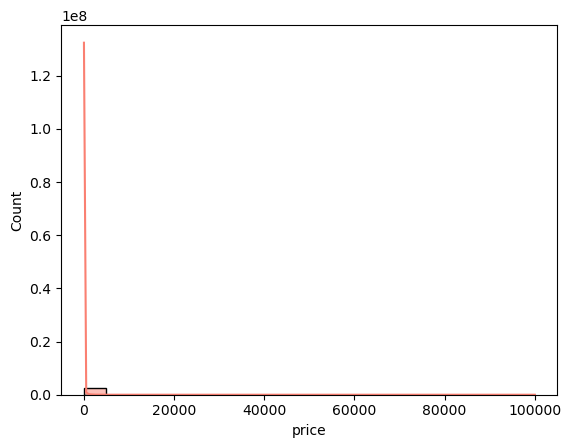

In [110]:
sns.histplot(df['price'], kde=True, bins=20, color="salmon");

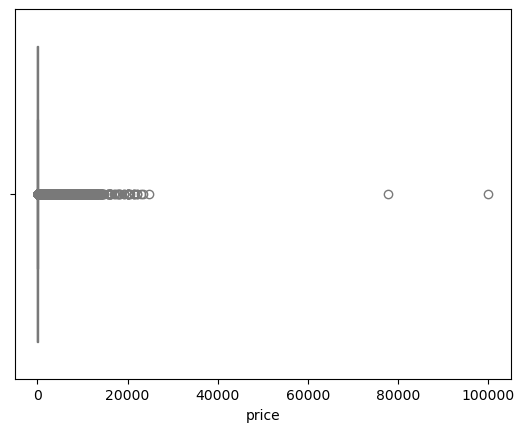

In [120]:
sns.boxplot(x = df['price'], color="lightblue");

the outlier at price 100000 biased the dataset as 75% of products are range between 0 - 45,99 

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [123]:
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode())

2.152836472966065
0.0
0    0.0
Name: stars, dtype: float64


it seams that customers rate badly products with mode being 0 stars

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [125]:
display(df['stars'].var())
display(df['stars'].std())
display(df['stars'].quantile([0.25, 0.5, 0.75]))

4.81743402976196

2.1948653785054697

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

ratings are not consistent as from 0 to 0,5 we have 0 stars at most common rating and it's starting from 0,75 that we have 4,4 rating

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [130]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

skewness is slightly positive which means the left and right sides of the distribution are mirror images so the distribution is quite symetrical
Platykurtic (Kurtosis < 0): The distribution has a flatter peak and thinner tails, indicating fewer outliers.

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

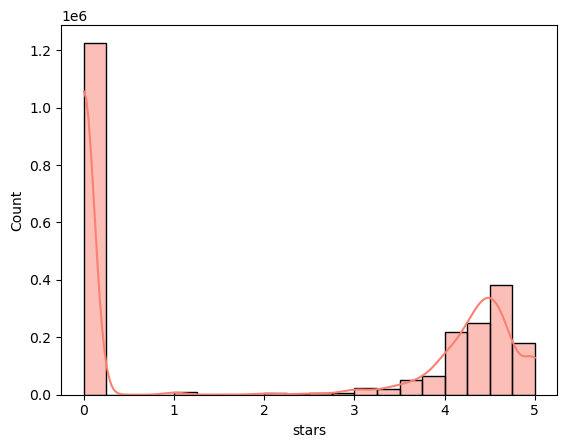

In [133]:
sns.histplot(df['stars'], kde=True, bins=20, color="salmon");

0 is the most common rating